# How well do jobs & skills pay for Data roles?

## Methodology 

1. Evaluate the median salary for the top 3 data roles and their senior position.
2. Find the median salary per skill for Data Analyst Jobs.
3. Visualise the highest paying skills & most demanded skills.

In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# filter for jobs in the UK & dropna values the salary_year_avg column
df_uk = df[(df['job_country'] == 'United Kingdom')].dropna(subset=['salary_year_avg']).copy()
df_uk['salary_year_gbp'] = df_uk['salary_year_avg'] * 0.79 # convert currency into GBP. conversion taken 17/02/2025

In [15]:
job_titles = df_uk['job_title_short'].value_counts().index[:6].tolist()

job_titles = sorted(job_titles[:6])

job_titles

['Data Analyst',
 'Data Engineer',
 'Data Scientist',
 'Senior Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist']

In [28]:
df_uk_top6 = df_uk[df_uk['job_title_short'].isin(job_titles)]
# Order from smallest to largest median salary using a groupby method:
job_order = df_uk_top6.groupby('job_title_short')['salary_year_gbp'].median().sort_values(ascending=False).index

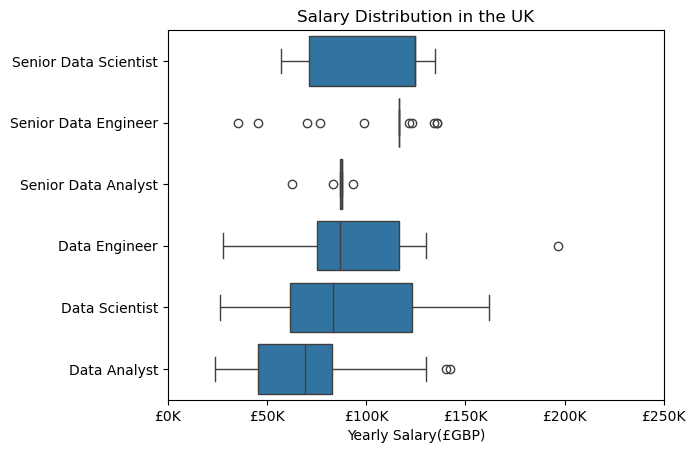

In [23]:
sns.boxplot(data=df_uk_top6, x='salary_year_gbp', y='job_title_short',order=job_order)

plt.title('Salary Distribution in the UK')
plt.xlabel('Yearly Salary(£GBP)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int((x/1000))}K'))
plt.xlim(0, 250_000) 
plt.show()

### Investigate Median Salary for varying Skills for Data Analyst Roles.

In [33]:
df_da_uk = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_da_uk = df_da_uk.dropna(subset=['salary_year_avg'])

df_da_uk['salary_year_gbp'] = df_da_uk['salary_year_avg'] * 0.79 # convert currency into GBP. conversion taken 17/02/2025

In [47]:
df_da_uk = df_da_uk.explode('job_skills')

In [49]:
df_da_uk[['salary_year_gbp', 'job_skills']].head(5)



,salary_year_gbp,job_skills
2602,40301.06,excel
2602,40301.06,word
2602,40301.06,outlook
16526,79395.00,sql
16526,79395.00,jupyter


In [51]:
df_da_top_pay_skills = df_da_uk.groupby('job_skills')['salary_year_gbp'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_da_top_pay_skills = df_da_top_pay_skills.head(10)

In [63]:
df_da_top_skills = df_da_uk.groupby('job_skills')['salary_year_gbp'].agg(['count', 'median']).sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False) #2 #the second .sort_values sorts the top 10 skills by mention by their pay.


In [64]:
df_da_top_pay_skills

,count,median
job_skills,,
pandas,1,140053.57
tensorflow,1,140053.57
numpy,1,140053.57
c++,1,140053.57
pytorch,1,140053.57
aurora,1,130350.00
mongodb,2,130350.00
mysql,3,130350.00
aws,3,130350.00


In [65]:
df_da_top_skills

,count,median
job_skills,,
tableau,13,79395.000
sql,33,77815.000
looker,6,75849.875
python,25,70389.000
power bi,7,70389.000
sas,8,63205.530
r,9,60843.825
excel,29,59684.500
go,9,56090.000


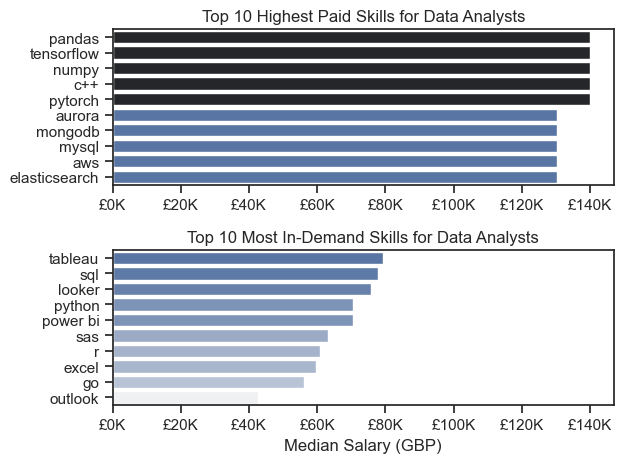

In [66]:

fig, ax = plt.subplots(2, 1)

sns.set_theme(style='ticks')

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_da_top_pay_skills, x='median', y=df_da_top_pay_skills.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False) #_r reverses coloring


ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int(x/1000)}K'))

# Top 10 Most in-demand Skills for Data Analysts
sns.barplot(data=df_da_top_skills, x='median', y=df_da_top_skills.index, ax=ax[1], hue='median', palette='light:b', legend=False)


ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (GBP)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'£{int(x/1000)}K'))

#set x lim to 200_000 to match the top graph. 
ax[1].set_xlim(ax[0].get_xlim()) # ax[0].get_xlim() gives me the x lim of ax[0], 
fig.tight_layout() #stops overlap between axis labels and titles